# Расчет проводимости трубопроводов с помощью МУК

In [1]:
import os
import math
import numpy as np
from graph import Graph #собственный класс для графиков
from matplotlib  import pyplot as plt
from rectangular import Rectangular, elementary

## Тестирование

### Проверка элементарного УК

In [2]:
def angles(num = 5):
    #зависимость элементарного УК от угла
    c_i = [1/2, 0, 1/2]
    c_j = [1/2, 1, 1/2]
    n_i = [0,1,0]
    angle_ar = np.linspace(0,1,num)*math.pi
    
    x, y = np.sin(angle_ar), np.cos(angle_ar)
    Y    = []
    for i in range(num):
        n_j = [x[i], y[i], 0]
        X   = angle_ar/math.pi*180
        Y.append(elementary(c_i,c_j,n_i,n_j,0.05))
    
    graph = Graph()
    graph.customize_graph("Зависимость  элем-го УК от угла", "Угол в градусах")
    plt.plot(X,Y, marker="o")
    graph.save("angle.png", "tests")
    return

def distance(num = 5):
    #зависимость  элем-го УК от расстояния
    c_i  = [1/2, 0, 1/2]
    n_i  = [0,1,0]
    n_j  = [np.sin(math.pi/4), np.cos(math.pi/4),0]
    dist = np.linspace(0,10,num)
    Y    = []
    for d in dist:
        c_j = c_j = [1/2, d, 1/2]
        Y.append(elementary(c_i,c_j,n_i,n_j,0.05))
        
    graph = Graph()
    graph.customize_graph("Зависимость  элем-го УК от расстояния", "Расстояние")
    plt.plot(dist,Y, marker="o")
    graph.save("distance.png", "tests")
    return

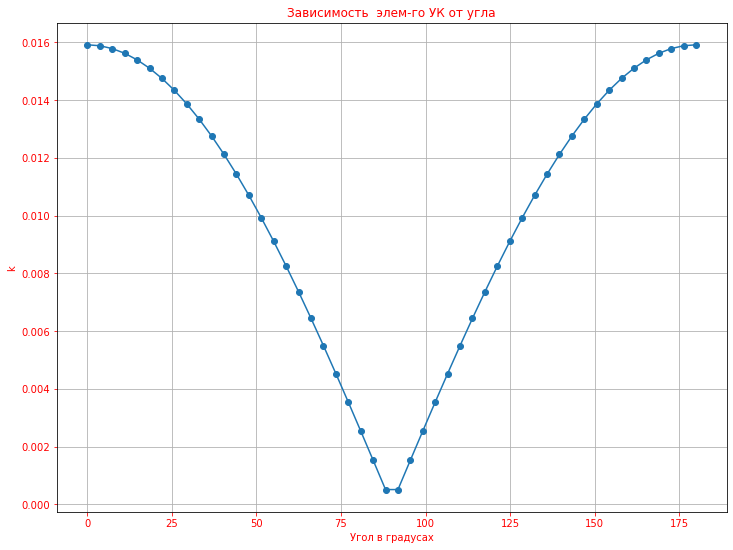

In [3]:
angles(50)

C:\Users\ASUS\MethodOfAngularCoefficients\rectangular.py:23: RuntimeWarning: invalid value encountered in double_scalars
  cos_1 = abs(scalar_prod(normal_i, center_j - center_i)) / (r * n_i)
C:\Users\ASUS\MethodOfAngularCoefficients\rectangular.py:24: RuntimeWarning: invalid value encountered in double_scalars
  cos_2 = abs(scalar_prod(normal_j, center_i - center_j)) / (r * n_j)


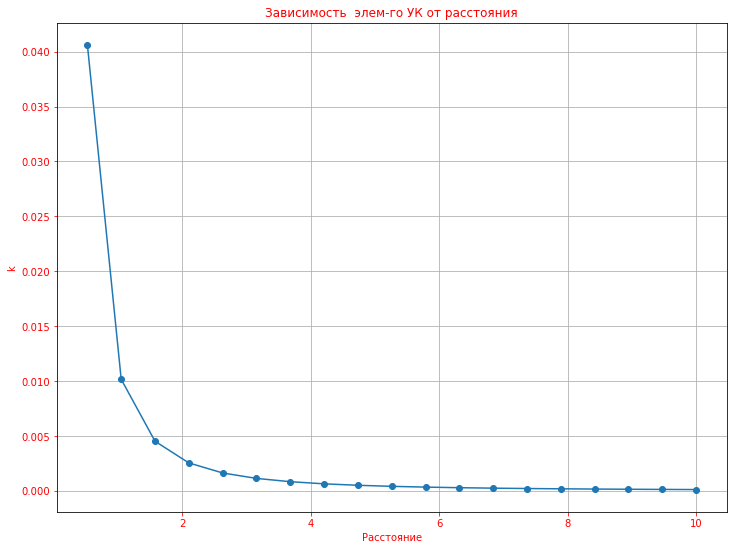

In [4]:
distance(20)

### Проверка УК

In [5]:
def test_1(phi):
    #вывод всех пар УК
    for i in range(1,len(phi)):
        for j in range(1,len(phi[i])):
            print("phi_" + str(i)+str(j) + " =", phi[i][j])
    print("\n")
    return

def test_2(phi):
    #свойство замкнутости
    for i in range(1,len(phi)):
        sum = 0
        for j in range(1, len(phi[i])):
            sum += phi[i][j]
        if round(1 - sum,5) != 0:
                print("Свойство замкнутости не выполнено для i =", i)
    print("Проверка на замкнутость закончена \n")
    return

def test_3(t, num_1 = 10, num_2 = 10):
    #свойство взаимности
    phi = t.matrix(num_1, num_2)
    for i in range(1, len(phi)):
        for j in range(1, len(phi[i])):
            if round(phi[i][j] * t.areas[i-1],5) != round(phi[j][i] * t.areas[j-1],5):
                print("Свойство взаимности не выполнено для i =", i, "и j =", j)
    print("Проверка на взаимность закончена \n")   
    return

In [6]:
tube_1, tube_2 = Rectangular(1,1,1), Rectangular(1,5,1)
phi_1,  phi_2  = tube_1.matrix(100,100), tube_2.matrix(100,100)

In [7]:
print("phi для a = 1, b = 1, L = 1:")
test_1(phi_1)
print("phi для a = 1, b = 5, L = 1:")
test_1(phi_2)

phi для a = 1, b = 1, L = 1:
phi_11 = 0.0
phi_12 = 0.20042981274394034
phi_13 = 0.21343962958951387
phi_14 = 0.21343962958951387
phi_15 = 0.2134396295895138
phi_16 = 0.21343962958951396
phi_21 = 0.20042981274394034
phi_22 = 0.0
phi_23 = 0.21343962958951396
phi_24 = 0.213439629589514
phi_25 = 0.2134396295895139
phi_26 = 0.21343962958951404
phi_31 = 0.2134396295895139
phi_32 = 0.21343962958951396
phi_33 = 0.0
phi_34 = 0.21343962958951399
phi_35 = 0.20042981274394034
phi_36 = 0.2134396295895141
phi_41 = 0.21343962958951387
phi_42 = 0.21343962958951396
phi_43 = 0.21343962958951385
phi_44 = 0.0
phi_45 = 0.21343962958951376
phi_46 = 0.20042981274394034
phi_51 = 0.2134396295895138
phi_52 = 0.21343962958951387
phi_53 = 0.20042981274394034
phi_54 = 0.2134396295895139
phi_55 = 0.0
phi_56 = 0.21343962958951399
phi_61 = 0.213439629589514
phi_62 = 0.21343962958951404
phi_63 = 0.21343962958951396
phi_64 = 0.20042981274394034
phi_65 = 0.2134396295895139
phi_66 = 0.0


phi для a = 1, b = 5, L = 1:
phi

In [8]:
test_2(phi_1)
test_2(phi_2)

Свойство замкнутости не выполнено для i = 1
Свойство замкнутости не выполнено для i = 2
Свойство замкнутости не выполнено для i = 3
Свойство замкнутости не выполнено для i = 4
Свойство замкнутости не выполнено для i = 5
Свойство замкнутости не выполнено для i = 6
Проверка на замкнутость закончена 

Свойство замкнутости не выполнено для i = 1
Свойство замкнутости не выполнено для i = 2
Свойство замкнутости не выполнено для i = 3
Свойство замкнутости не выполнено для i = 4
Свойство замкнутости не выполнено для i = 5
Свойство замкнутости не выполнено для i = 6
Проверка на замкнутость закончена 



In [9]:
test_3(tube_1)
test_3(tube_2)

Проверка на взаимность закончена 

Проверка на взаимность закончена 



### Проверка оэффициента Клаузинга

In [10]:
def test_4(t, num_1 = 100, num_2 = 100):
    #меньше ли 1
    print("Коэффициент Клаузинга меньше единицы", t.clausing(num_1,num_2) <= 1)
    print("\n")
    return

def test_5(t, num_1 = 100, num_2 = 100):
    #больше ли 0
    print("Коэффициент Клаузинга больше нуля", t.clausing(num_1,num_2) >= 0)
    print("\n")
    return

In [11]:
test_4(tube_1)
test_4(tube_2)

Коэффициент Клаузинга меньше единицы True


Коэффициент Клаузинга меньше единицы True




In [12]:
test_5(tube_1)
test_5(tube_2)

Коэффициент Клаузинга больше нуля True


Коэффициент Клаузинга больше нуля True




### Графики

In [13]:
#ф-ция строит кривую на графике
#и сохраняет его
def lines(x, k, filename = "", dirname = ""):
    plt.scatter(x, k, marker="o")
    plt.plot(x, k)
    
    plt.legend()
    Graph().save(filename, dirname)
    return

#ф-ция строит, называет,
#выводит и сохраняет 2 графика
#для разных прямоугольных сечений
def draw(num_1 = 10, num_2 = 10):
    x   = range(1,11)
    k_1 = [Rectangular(1,1,element).clausing(num_1, num_2) for element in x]
    
    graph = Graph()
    graph.customize_graph("Проводимость в прямоугольном сечении при b = 1", "L")
    lines(x, k_1, "b1.png", "rectangular")
    plt.show()
    
    k_2 = [Rectangular(1,5,element).clausing(num_1, num_2) for element in x]
    graph.customize_graph("Проводимость в прямоугольном сечении при b = 5", "L")
    lines(x, k_2, "b5.png", "rectangular")
    plt.show()
    return

No handles with labels found to put in legend.


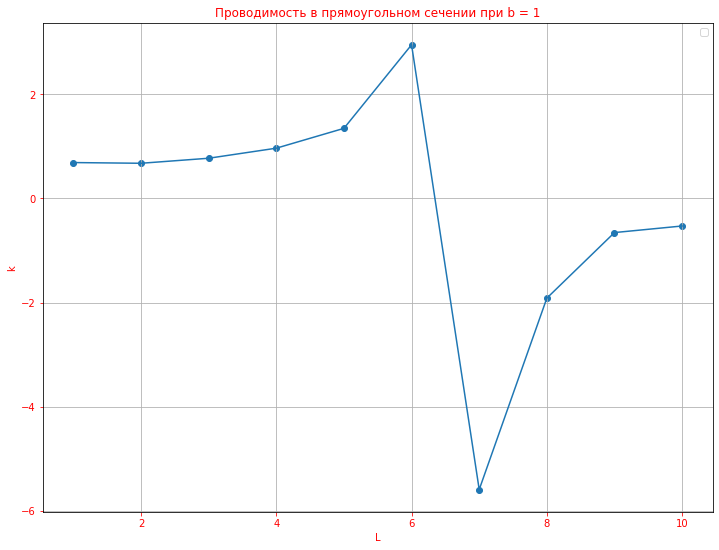

In [ ]:
draw(100,100)